In [9]:
import nba_api 
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import FranchisePlayers as fp
from nba_api.stats.endpoints import CommonPlayerInfo as cp
import matplotlib.pyplot as plt
import time
from scipy.spatial import distance
from sklearn import preprocessing as pre
import numpy as np 
import pandas as pd


<h2> Retrieving Data </h2>

In [10]:
#storing all teams and players into lists
teams_list = teams.get_teams()
players_list = players.get_players()


#storing desired teamid 
raptors_id = '1610612761'




In [19]:
#This extracts all players that ever played for the team 
team_players = fp(league_id='00', per_mode_detailed='PerGame', season_type_all_star='Regular Season', team_id=raptors_id)

#stroing all team players in a dataframe 
team_players_df = team_players.get_data_frames()[0]




In [20]:
# this is just code to work mess around with data frames and understand them better 

# team_players_df.iloc[20:25]
# team_players_df.loc[tor_players_df['GP']>200]
# team_players_df['PLAYER']
# team_players_df = tor_players_df.sort_values(by=['GP'],ascending=False)
# team_players_df.columns

<h2> Adding helper methods </h2>
<p> The stats that we want from players to include are pts, reb, ast, stl, blk, tov, pf which are already in this data frame. But to make the most accurate comparisons we are going to want TS% 3PAr and FTr which are not in the df therefore have to be calculated. These helper methods make such calculations </p>

In [21]:
#Helper methods that take in the original data frame and output each stat 
def add_true_shooting(df):
    list_of_TS = []
    #goes through each row of the df and uses data to calculate each stat
    for index, player in df.iterrows():
        #this if statement prevents a divide by zero exception
        if(player['FGA']==0):
            list_of_TS.append(0.00000)
            continue
        ts = player['PTS']/(2*(player['FGA']+(0.44*player['FTA'])))
        #appends this calculated stat to the list 
        list_of_TS.append(ts)
    #adds list to dataframe with proper header    
    df['TS'] = list_of_TS
    return df

#these are methods are similar to the one above just implementing their own stat
def add_3PAr(df):
    list_of_3PAr = []
    for index, player in df.iterrows():
        if(player['FGA']==0):
            list_of_3PAr.append(0.00000)
            continue
        val = player['FG3A']/player['FGA']
        list_of_3PAr.append(val)
       
    df['3PAr'] = list_of_3PAr
    return df

def add_FTr(df):
    list_of_FTr = []
    for index, player in df.iterrows():
        if(player['FGA']==0):
            list_of_FTr.append(0.00000)
            continue
        val = player['FTA']/player['FGA']
        list_of_FTr.append(val)
       
    df['FTr'] = list_of_FTr
    return df

In [22]:
#adding true shooting 3PAr and FTr to our data frame 
team_players_df = add_true_shooting(add_3PAr(add_FTr(team_players_df )))

#tor_players_df.head(30)

<h2> Finding how many games average Raptor will play</h2>

155.45217391304348


[]

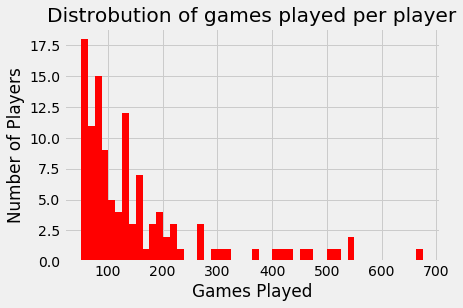

In [35]:
#checking what is the average number of games played 
print(team_players_df['GP'].mean())

#tor_players_df.hist(column='GP').show()
plt.style.use('fivethirtyeight')

#making the plot 
gamesPlayedHist, g = plt.subplots()

g.hist(team_players_df['GP'],color='red',bins=50)
g.set_xlabel("Games Played")
g.set_ylabel("Number of Players")
g.set_title("Distrobution of games played per player")
g.plot()

<h2> Finding average stats for all raptors players in franchise history</h2> 

In [24]:
#Only stroing players that have played over 50 games for the raptors
team_players_df = team_players_df.sort_values(by=['GP'],ascending=False)

################# COMMENT OUT THIS LINE IF YOU WANT ALL PLAYERS ########################################
team_players_df =  team_players_df.loc[team_players_df['GP']>50]
########################################################################################################
names = team_players_df['PLAYER']

team_players_df

,LEAGUE_ID,TEAM_ID,TEAM,PERSON_ID,PLAYER,SEASON_TYPE,ACTIVE_WITH_TEAM,GP,FGM,FGA,...,REB,AST,PF,STL,TOV,BLK,PTS,FTr,3PAr,TS
183,00,1610612761,Toronto Raptors,201942,DeMar DeRozan,Regular Season,0,675,6.986666,15.602962,...,4.057777,3.078518,2.220740,0.970370,1.960000,0.274074,19.697777,0.406096,0.107102,0.535530
161,00,1610612761,Toronto Raptors,200768,Kyle Lowry,Regular Season,1,549,5.630236,13.271402,...,4.856102,7.112932,2.921675,1.486338,2.624772,0.322404,17.575591,0.349026,0.503157,0.574009
99,00,1610612761,Toronto Raptors,2050,Morris Peterson,Regular Season,0,542,4.319188,10.261992,...,3.808118,1.780442,2.479704,1.018450,1.167896,0.225092,11.988929,0.233369,0.387990,0.529747
152,00,1610612761,Toronto Raptors,101181,Jose Calderon,Regular Season,0,525,3.853333,8.013333,...,2.504761,7.180952,1.727619,0.893333,1.725714,0.085714,9.971428,0.198716,0.279059,0.572151
124,00,1610612761,Toronto Raptors,2547,Chris Bosh,Regular Season,0,509,7.100196,14.432220,...,9.383104,2.190569,2.611001,0.779960,2.212180,1.178781,20.186640,0.512796,0.022870,0.570613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,00,1610612761,Toronto Raptors,200779,Steve Novak,Regular Season,0,54,1.111111,2.703703,...,1.074074,0.240740,0.814814,0.222222,0.092592,0.074074,3.296296,0.041096,0.835617,0.598762
115,00,1610612761,Toronto Raptors,2423,Chris Jefferies,Regular Season,0,53,1.471698,3.773584,...,1.132075,0.433962,1.056603,0.358490,0.867924,0.301886,3.867924,0.220000,0.285000,0.467268
167,00,1610612761,Toronto Raptors,201153,Julian Wright,Regular Season,0,52,1.576923,3.076923,...,2.269230,1.115384,0.865384,0.750000,0.826923,0.384615,3.615384,0.268750,0.062500,0.525374
217,00,1610612761,Toronto Raptors,1626178,Rondae Hollis-Jefferson,Regular Season,1,52,2.673076,5.673076,...,4.884615,1.730769,2.019230,0.846153,0.942307,0.423076,7.211538,0.437288,0.057627,0.533034


In [25]:
#here we are going to take the stats that are important for our comparisons
team_numbers_df = team_players_df[['PTS', 'AST', 'REB', 'STL','BLK','TS','3PAr', 'FTr','TOV','PF']]
#Taking the mean for each column of our players dataframe
avg_player = team_numbers_df.mean()


avg_player

PTS     8.853353
AST     1.971658
REB     3.914966
STL     0.733922
BLK     0.482563
TS      0.526064
3PAr    0.234889
FTr     0.280735
TOV     1.244734
PF      2.099064
dtype: float64

<h2> Finding the most average raptors player </h2> 
<p> Here we are going do normalize the dataframes so that the distance measurements will be of equal weights. Then we will find how similar each player's stats are to the average by finding the distance between stat vectors. This measurement will be made using eucliadian distance and cosine similarity </p> 

In [26]:
#Firsr we have to append the mean average player to a dataframe
avg_player_df = pd.DataFrame([avg_player])
df_to_normalize = pd.concat([team_numbers_df,avg_player_df])


In [27]:
#now we have to normalize the data 
x = df_to_normalize.values #returns a numpy array
min_max_scaler = pre.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized_data = pd.DataFrame(x_scaled)

#printing normalized data
df_normalized_data

,0,1,2,3,4,5,6,7,8,9
0,0.725688,0.324124,0.404321,0.411777,0.095926,0.537886,0.128171,0.426197,0.537011,0.477523
1,0.641347,0.767955,0.493620,0.667796,0.112841,0.681379,0.602138,0.359558,0.728180,0.712065
2,0.419320,0.181322,0.376394,0.435634,0.078782,0.516321,0.464316,0.224511,0.309226,0.564175
3,0.339139,0.775438,0.230604,0.373552,0.030000,0.674451,0.333955,0.184048,0.469638,0.312518
4,0.745117,0.226440,1.000000,0.317297,0.412573,0.668714,0.027368,0.550787,0.609531,0.608109
...,...,...,...,...,...,...,...,...,...,...
111,0.096571,0.033194,0.077058,0.108167,0.105660,0.283335,0.341065,0.208900,0.222963,0.087987
112,0.086534,0.108158,0.204258,0.302431,0.134615,0.500017,0.074795,0.265823,0.211172,0.024003
113,0.229454,0.175857,0.496809,0.350142,0.148077,0.528580,0.068964,0.462619,0.244353,0.410095
114,0.716659,0.274502,0.707112,0.757274,0.308823,0.392564,0.252641,0.246525,0.836085,0.666102


In [28]:
#we are going to use test this using euclidian distance and cosine distance 
#I read euclidian is more useful so that will be the baseline 
cos_dist = []
e_dist = []
for name in names:
    i = list(names).index(name)
    
    e_dist.append([name, distance.euclidean(df_normalized_data.iloc[-1],df_normalized_data.iloc[i])])
    cos_dist.append([name,1 - distance.cosine(df_normalized_data.iloc[-1],df_normalized_data.iloc[i])])
    
e_most_simlar = sorted(e_dist, key=lambda x: x[1])
cos_most_simlar = sorted(cos_dist, key=lambda x: x[1], reverse= True)


e_most_simlar

[['James Johnson', 0.24252302514836083],
 ['Cory Joseph', 0.2659285637659849],
 ['Luis Scola', 0.27324797965737585],
 ['Tracy Murray', 0.29557814090871104],
 ['Morris Peterson', 0.3125612618303998],
 ['Rondae Hollis-Jefferson', 0.32806707361322235],
 ['Voshon Lenard', 0.333332089802422],
 ['Sonny Weems', 0.33951359136241777],
 ['Linas Kleiza', 0.3398481380733425],
 ['Carlos Rogers', 0.3406711677498104],
 ['Anthony Parker', 0.3461567912964696],
 ['Leandro Barbosa', 0.34674480941873065],
 ['Pascal Siakam', 0.35473386298078613],
 ['Carlos Delfino', 0.3608086428191745],
 ['Alan Anderson', 0.36917871480110676],
 ['Joey Graham', 0.38035677294155473],
 ['Juan Dixon', 0.38390534230670387],
 ['Antoine Wright', 0.39216702270021025],
 ['Norman Powell', 0.3928581107693463],
 ['Jerryd Bayless', 0.39532757152157744],
 ['Lamond Murray', 0.4026866738887718],
 ['Andrea Bargnani', 0.41434761819565236],
 ['OG Anunoby', 0.422956998733216],
 ['Jelani McCoy', 0.444501055583018],
 ['Jamario Moon', 0.44495366

<p> NOTE: Euclidian distance seemed to give more reasonable results from the eye test although there was similar outputs on at the extremes. From reading things online euclidian is the better suited measurement for something like this anyways so that makes sense </p>

<h2> Now we will try to get position data </h2>

In [29]:
# #Here we are going to retrieve the positions of every player 
# player_positions = []
# #looping through each player we want to get information for
# for index, player in tor_players_df.iterrows():
#     person_id = player['PERSON_ID']
#     #making request for player info 
#     raps_player = cp(player_id = person_id)
#     raps_player = raps_player.get_data_frames()[0]
#     #storing the player position and name into variables 
#     position = raps_player.iloc[0]['POSITION']
#     name = raps_player.iloc[0]['DISPLAY_FIRST_LAST']
#     #appending this information to the player position arr
#     player_positions.append([name, position])
#     print(name,position)
#     #This function is here so that the program doesn't over burden the API
#     time.sleep(100)
    
# THIS CODE WAS USED TO GET THE POSITION DATA 

In [30]:
# this will only work for other teams if we find a way to scrape the data 
player_positions = [['DeMar DeRozan', 'Guard'],
 ['Kyle Lowry', 'Guard'],
 ['Morris Peterson', 'Forward'],
 ['Jose Calderon', 'Guard'],
 ['Chris Bosh', 'Forward'],
 ['Jonas Valanciunas', 'Center'],
 ['Amir Johnson', 'Center'],
 ['Andrea Bargnani', 'Forward'],
 ['Alvin Williams', 'Guard'],
 ['Vince Carter', 'Guard'],
 ['Terrence Ross', 'Guard'],
 ['Doug Christie', 'Guard'],
 ['Antonio Davis', 'Center'],
 ['Norman Powell', 'Guard'],
 ['Joey Graham', 'Forward'],
 ['Patrick Patterson', 'Forward'],
 ['Pascal Siakam', 'Forward'],
 ['Anthony Parker', 'Guard'],
 ['Fred VanVleet', 'Guard'],
 ['Serge Ibaka', 'Forward'],
 ['James Johnson', 'Forward'],
 ['Charles Oakley', 'Forward'],
 ['OG Anunoby', 'Forward'],
 ['Damon Stoudamire', 'Guard'],
 ['Dell Curry', 'Guard'],
 ['Rasho Nesterovic', 'Center'],
 ['Tracy McGrady', 'Guard'],
 ['Jerome Williams', 'Forward'],
 ['Jalen Rose', 'Guard'],
 ['Ed Davis', 'Center'],
 ['Delon Wright', 'Guard'],
 ['Jason Kapono', 'Forward'],
 ['Matt Bonner', 'Center'],
 ['Cory Joseph', 'Guard'],
 ['Tracy Murray', 'Forward'],
 ['Kris Humphries', 'Forward'],
 ['Oliver Miller', 'Center'],
 ['Kevin Willis', 'Center'],
 ['Greivis Vasquez', 'Guard'],
 ['Lucas Nogueira', 'Center'],
 ['Milt Palacio', 'Guard'],
 ['Tyler Hansbrough', 'Forward'],
 ['Jakob Poeltl', 'Center'],
 ['Reggie Slater', 'Forward'],
 ['Jamario Moon', 'Forward'],
 ['Donyell Marshall', 'Forward'],
 ['Carlos Rogers', 'Forward'],
 ['John Wallace', 'Forward'],
 ['Sonny Weems', 'Guard'],
 ['Keon Clark', 'Center'],
 ['Rafer Alston', 'Guard'],
 ['T.J. Ford', 'Guard'],
 ['Marcus Camby', 'Center'],
 ['Michael Stewart', 'Center'],
 ['Zan Tabak', 'Center'],
 ['Dee Brown', 'Guard'],
 ['John Thomas', 'Center'],
 ['Rafael Araujo', 'Center'],
 ['CJ Miles', 'Forward'],
 ['Linas Kleiza', 'Forward'],
 ['Landry Fields', 'Guard'],
 ['Walt Williams', 'Forward'],
 ['Leandro Barbosa', 'Guard'],
 ['Michael Bradley', 'Forward'],
 ['DeMarre Carroll', 'Forward'],
 ['Jarrett Jack', 'Guard'],
 ['Aaron Gray', 'Center'],
 ['Lamond Murray', 'Forward'],
 ['Chris Childs', 'Guard'],
 ['Popeye Jones', 'Forward'],
 ['Jerryd Bayless', 'Guard'],
 ['Darrick Martin', 'Guard'],
 ['Muggsy Bogues', 'Guard'],
 ['Chris Boucher', 'Forward'],
 ['Carlos Delfino', 'Guard'],
 ['Bismack Biyombo', 'Center'],
 ['Alan Anderson', 'Forward'],
 ['Charlie Villanueva', 'Forward'],
 ['Danny Green', 'Guard'],
 ['Acie Earl', 'Forward'],
 ['Lou Williams', 'Guard'],
 ['Mike James', 'Guard'],
 ['Sharone Wright', 'Center'],
 ['Alvin Robertson', 'Guard'],
 ['Luis Scola', 'Forward'],
 ['Pape Sow', 'Forward'],
 ['Shawn Respert', 'Guard'],
 ['Hedo Turkoglu', 'Forward'],
 ['Chuck Hayes', 'Center'],
 ['Jorge Garbajosa', 'Forward'],
 ['Loren Woods', 'Center'],
 ['Roko Ukic', 'Guard'],
 ['Michael Curry', 'Guard'],
 ['Jelani McCoy', 'Center'],
 ['Antoine Wright', 'Forward'],
 ['Marco Belinelli', 'Guard'],
 ['Terence Davis', 'Guard'],
 ['Patrick McCaw', 'Guard'],
 ['John Lucas III', 'Guard'],
 ['Voshon Lenard', 'Guard'],
 ['Juan Dixon', 'Guard'],
 ['Jimmy King', 'Guard'],
 ['Marc Gasol', 'Center'],
 ['Eric Williams', 'Forward'],
 ['Eric Montross', 'Center'],
 ['Hakeem Olajuwon', 'Center'],
 ['Kawhi Leonard', 'Forward'],
 ['John Salmons', 'Forward'],
 ['Reggie Evans', 'Center'],
 ['Mark Jackson', 'Guard'],
 ['Steve Novak', 'Forward'],
 ['Chris Jefferies', 'Forward'],
 ['Julian Wright', 'Forward'],
 ['Rondae Hollis-Jefferson', 'Forward'],
 ['Rudy Gay', 'Forward']]


<h2> First we are going to get the average stats for each position (Guard, Forward, Center) </h2>

In [31]:
#adding a position column to the 
just_positions = []
for player in player_positions:
    just_positions.append(player[1])

#since the dataframe is in the same order as the list we can add the positions as a column 
team_numbers_df.insert(2,"Position",just_positions)

#now we find the mean for each position
mean_per_position = team_numbers_df.groupby('Position').mean()



In [32]:
mean_per_position

,PTS,AST,REB,STL,BLK,TS,3PAr,FTr,TOV,PF
Position,,,,,,,,,,
Center,6.533062,0.925142,5.190223,0.520321,0.884958,0.523687,0.041779,0.347221,1.099417,2.476027
Forward,9.138438,1.299293,4.354023,0.707075,0.504584,0.528802,0.261818,0.283653,1.124010,2.118399
Guard,9.915216,3.233736,2.748852,0.883586,0.228535,0.524760,0.320131,0.239468,1.446737,1.862357


In [33]:
#now we are going to append these stats to the numbers df to be normailized 
datadata_to_be_normalized = pd.concat([df_tor_numbers, mean_per_position],sort = False)

data_to_be_normalized = data_to_be_normalized[['PTS', 'AST', 'REB', 'STL','BLK','TS','3PAr', 'FTr','TOV','PF']]

#now we are going to normalize the data
x = data_to_be_normalized.values #returns a numpy array
min_max_scaler = pre.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized_data_pos = pd.DataFrame(x_scaled)

df_normalized_data_pos

NameError: name 'df_tor_numbers' is not defined

In [34]:
e_dist_guard = []
e_dist_forward = []
e_dist_center = []

for player in player_positions:
    i = list(player_positions).index(player)
    if player[1] == 'Guard':
        e_dist_guard.append([player[0], distance.euclidean(df_normalized_data_pos.iloc[-1],df_normalized_data_pos.iloc[i])])
    if player[1] == 'Forward':
        e_dist_forward.append([player[0], distance.euclidean(df_normalized_data_pos.iloc[-2],df_normalized_data_pos.iloc[i])])
    if player[1] == 'Center':
        e_dist_center.append([player[0], distance.euclidean(df_normalized_data_pos.iloc[-3],df_normalized_data_pos.iloc[i])])

        
e_guard_most_simlar = sorted(e_dist_guard, key=lambda x: x[1])
e_forward_most_simlar = sorted(e_dist_forward, key=lambda x: x[1])
e_center_most_simlar = sorted(e_dist_center, key=lambda x: x[1])

# e_guard_most_simlar
#e_forward_most_simlar
e_center_most_simlar

NameError: name 'df_normalized_data_pos' is not defined